In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
c=tf.multiply(a,b)

In [3]:
with tf.Session() as ss:
    print(ss.run(c,feed_dict={a:3,b:6}))

18.0


# Simple Lin Reg

In [4]:
points= 100
vector_s = []
for i in range(points):
    #Fungsi y= 0.7*x + 0.12 
    x=np.random.normal(0,0.62)
    y=0.7*x + 0.12 + np.random.normal(0,0.13)
    vector_s.append([x,y])

In [5]:
X_d = [k[0] for k in vector_s]
y_d = [k[1] for k in vector_s]

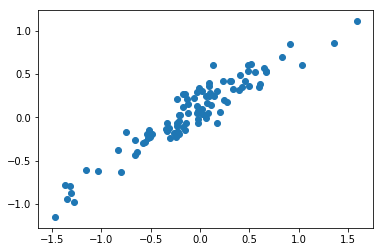

In [6]:
plt.scatter(X_d,y_d)
plt.show()

In [7]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1.0]))
y = W * X_d + b

W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b2 = tf.Variable(tf.zeros([1.0]))
y2 = W2 * X_d + b2

In [11]:
loss = tf.reduce_mean(tf.square(y-y_d))
loss2 = tf.sqrt(tf.reduce_mean(tf.square(y2-y_d)))
optim = tf.train.GradientDescentOptimizer(learning_rate=0.003)
training = optim.minimize(loss)
training2 = optim.minimize(loss2)

Dengan loss function SSE (tf.reduce_mean(tf.square(y-y_d)))

Step=0, loss=0.038457, [W=0.489249 b=0.000569]
Step=1, loss=0.038314, [W=0.489579 b=0.001135]
Step=2, loss=0.038173, [W=0.489909 b=0.001698]
Step=3, loss=0.038033, [W=0.490238 b=0.002258]
Step=4, loss=0.037894, [W=0.490567 b=0.002814]
Step=5, loss=0.037756, [W=0.490896 b=0.003367]
Step=6, loss=0.037620, [W=0.491224 b=0.003917]
Step=7, loss=0.037484, [W=0.491552 b=0.004464]
Step=8, loss=0.037350, [W=0.491879 b=0.005008]
Step=9, loss=0.037218, [W=0.492207 b=0.005549]
Step=10, loss=0.037086, [W=0.492533 b=0.006086]
Step=11, loss=0.036955, [W=0.492860 b=0.006621]
Step=12, loss=0.036826, [W=0.493186 b=0.007152]
Step=13, loss=0.036698, [W=0.493512 b=0.007681]
Step=14, loss=0.036571, [W=0.493837 b=0.008206]
Step=15, loss=0.036445, [W=0.494162 b=0.008729]
Step=16, loss=0.036320, [W=0.494487 b=0.009248]
Step=17, loss=0.036196, [W=0.494811 b=0.009765]
Step=18, loss=0.036074, [W=0.495135 b=0.010279]
Step=19, loss=0.035952, [W=0.495459 b=0.010789]
Step=20, loss=0.035832, [W=0.495782 b=0.011297]
St

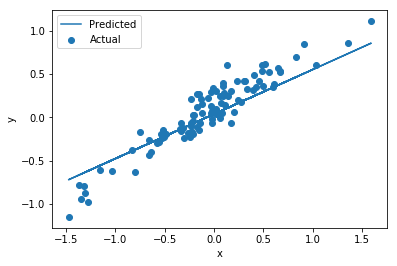

In [12]:
init = tf.global_variables_initializer()
epoch = 80
with tf.Session() as ss:
    ss.run(init)
    for step in range(epoch):
        ss.run(training)
        # Get access to graph variables(just read) with session.run(varName)    
        print("Step=%d, loss=%f, [W=%f b=%f]" % (step,ss.run(loss),ss.run(W),ss.run(b)))
    plt.scatter(X_d, y_d, label="Actual")
    plt.plot(X_d, ss.run(W) * X_d + ss.run(b),label="Predicted")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Dengan loss function RMSE (tf.sqrt(tf.reduce_mean(tf.square(y2-y_d)))

Step=0, loss=0.751942, [W=-0.634516 b=0.000003]
Step=1, loss=0.751033, [W=-0.632865 b=0.000006]
Step=2, loss=0.750124, [W=-0.631214 b=0.000010]
Step=3, loss=0.749216, [W=-0.629563 b=0.000014]
Step=4, loss=0.748307, [W=-0.627912 b=0.000019]
Step=5, loss=0.747399, [W=-0.626261 b=0.000024]
Step=6, loss=0.746491, [W=-0.624610 b=0.000030]
Step=7, loss=0.745583, [W=-0.622960 b=0.000037]
Step=8, loss=0.744675, [W=-0.621309 b=0.000044]
Step=9, loss=0.743767, [W=-0.619659 b=0.000051]
Step=10, loss=0.742859, [W=-0.618008 b=0.000059]
Step=11, loss=0.741951, [W=-0.616358 b=0.000068]
Step=12, loss=0.741044, [W=-0.614708 b=0.000077]
Step=13, loss=0.740136, [W=-0.613058 b=0.000087]
Step=14, loss=0.739229, [W=-0.611409 b=0.000097]
Step=15, loss=0.738322, [W=-0.609759 b=0.000108]
Step=16, loss=0.737415, [W=-0.608109 b=0.000119]
Step=17, loss=0.736508, [W=-0.606460 b=0.000131]
Step=18, loss=0.735601, [W=-0.604810 b=0.000143]
Step=19, loss=0.734694, [W=-0.603161 b=0.000156]
Step=20, loss=0.733787, [W=-0.

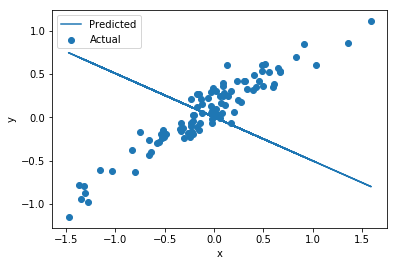

In [13]:
with tf.Session() as ss:
    ss.run(init)
    for step in range(epoch):
        ss.run(training2)
        # Get access to graph variables(just read) with session.run(varName)    
        print("Step=%d, loss=%f, [W=%f b=%f]" % (step,ss.run(loss2),ss.run(W2),ss.run(b2)))
    plt.scatter(X_d, y_d, label="Actual")
    plt.plot(X_d, ss.run(W2) * X_d + ss.run(b2),label="Predicted")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Dengan RMSE ternyata lebih cepat mencapai nilai loss yang lebih rendah dengan epoch yg sama